# Analysis of the outputs from the Feed-Forward and LSTM models

Various analyses done to compare the outcomes of the two models 

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as plt_colors
from datetime import datetime

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [208]:
## Data location

aws_locations = {
    'Melbourne Airport': {'station_id':86282, },
    'Moorabbin Airport': {'station_id':86077, },
    'Laverton RAAF': {'station_id':87031, },
}

predictions_dir = 'predictions/'
out_dir ='predictions/analysis_plots/'


## 1. Feed-Forward Model Analysis

### Scatter Plot

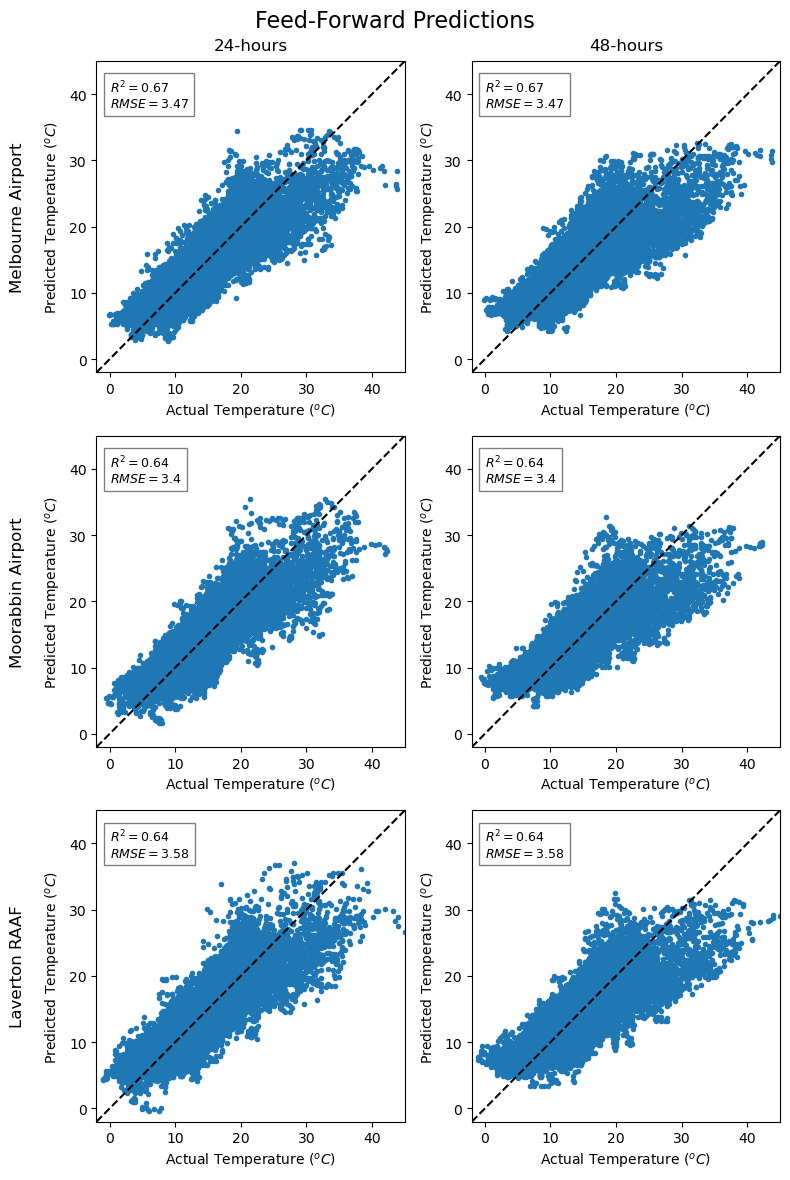

In [210]:
# Get station list
stations = list(aws_locations.keys())

fig, axes = plt.subplots(nrows=len(stations), ncols=2, figsize=(8, 12))

idx = 0

for s in range(len(stations)):
    station = stations[s]

    data_dir = f"{predictions_dir}pred_feed_forward_{aws_locations[station]['station_id']}.csv"

    data = pd.read_csv(data_dir)

    obs_24 = data['Measured_24'].to_numpy()
    preds_24 = data['Prediction_24'].to_numpy()
    obs_48 = data['Measured_48'].to_numpy()
    preds_48 = data['Prediction_48'].to_numpy()

    r2_24 = r2_score(obs_24, preds_48)
    r2_48 = r2_score(obs_48, preds_48)
    mse_24 = mean_squared_error(obs_24, preds_48, squared=False)
    mse_48 = mean_squared_error(obs_24, preds_48, squared=False)

    axes[idx, 0].scatter(obs_24, preds_24, marker='.')
    axes[idx, 0].plot([-2, 45],[-2, 45], 'k--')
    axes[idx, 0].set_xlim(-2, 45)
    axes[idx, 0].set_ylim(-2, 45)
    # axes[idx, 0].set_title(f'24-hours - {station}')
    axes[idx,0].set_ylabel("Predicted Temperature ($^oC$)")
    axes[idx,0].set_xlabel("Actual Temperature ($^oC$)")
    eval_string = f"$R^2={np.round(r2_24,2)}$ \n$RMSE={np.round(mse_24,2)}$"
    axes[idx, 0].text(0,38,eval_string, fontsize=9, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    # idx+=1
    axes[idx, 1].scatter(obs_48, preds_48, marker='.')
    axes[idx, 1].plot([-2, 45],[-2, 45], 'k--')
    axes[idx, 1].set_xlim(-2, 45)
    axes[idx, 1].set_ylim(-2, 45)
    # axes[idx, 1].set_title(f'48-hours - {station}')
    axes[idx,1].set_ylabel("Predicted Temperature ($^oC$)")
    axes[idx,1].set_xlabel("Actual Temperature ($^oC$)")
    eval_string = f"$R^2={np.round(r2_48,2)}$ \n$RMSE={np.round(mse_48,2)}$"
    axes[idx, 1].text(0,38,eval_string, fontsize=9, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))
    idx+=1

#https://stackoverflow.com/questions/25812255/row-and-column-headers-in-matplotlibs-subplots
cols = ['24-hours', '48-hours']
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 8),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], stations):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 10, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

fig.suptitle(f"Feed-Forward Predictions", fontsize=16)
fig.tight_layout()
fig.savefig(f'{out_dir}feed_forward_performance_scatter.png', dpi=500)
plt.show()

## Do a hexbin plot

### Hexbin plot

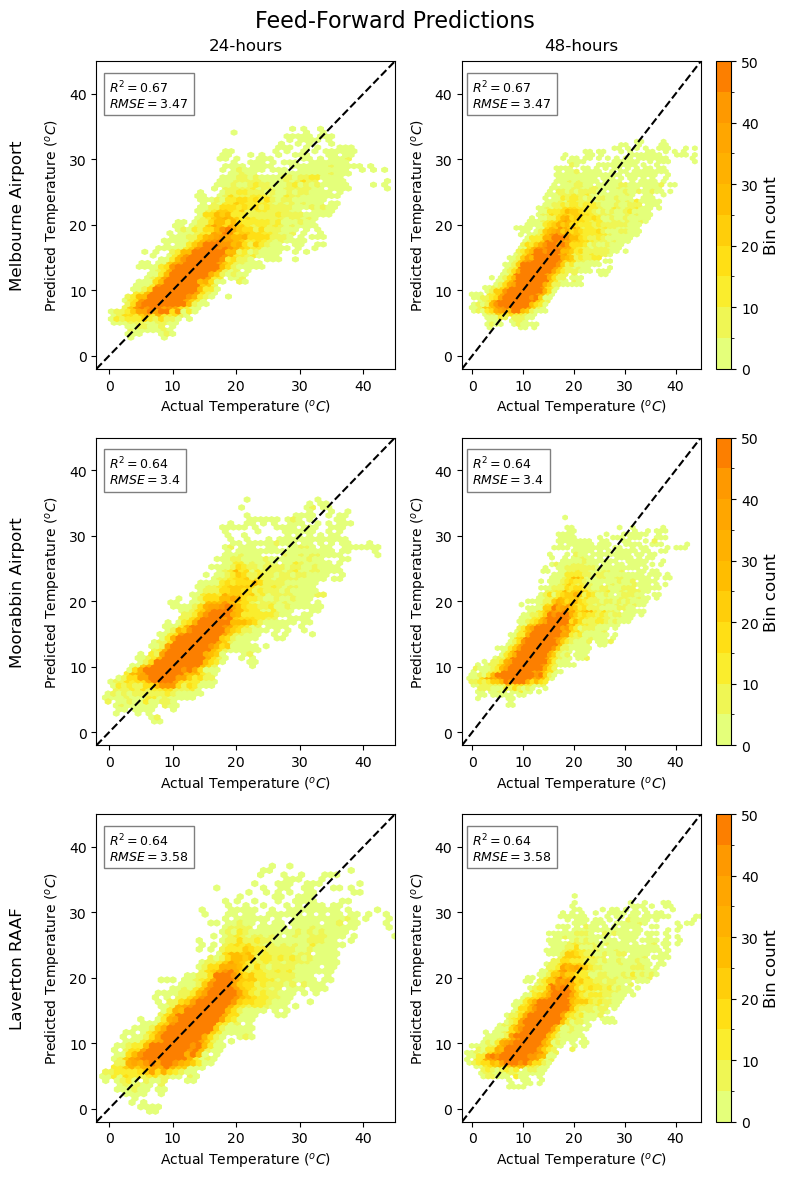

In [211]:
# Get station list
stations = list(aws_locations.keys())

fig, axes = plt.subplots(nrows=len(stations), ncols=2, figsize=(8, 12))

idx = 0

for s in range(len(stations)):
    station = stations[s]

    data_dir = f"{predictions_dir}pred_feed_forward_{aws_locations[station]['station_id']}.csv"
    data = pd.read_csv(data_dir)

    obs_24 = data['Measured_24'].to_numpy()
    preds_24 = data['Prediction_24'].to_numpy()
    obs_48 = data['Measured_48'].to_numpy()
    preds_48 = data['Prediction_48'].to_numpy()

    r2_24 = r2_score(obs_24, preds_48)
    r2_48 = r2_score(obs_48, preds_48)
    mse_24 = mean_squared_error(obs_24, preds_48, squared=False)
    mse_48 = mean_squared_error(obs_24, preds_48, squared=False)

    ## Hexbins
    bounds = np.arange(0,55,5)
    # cmap = plt.get_cmap('Wistia', 6)
    cmap = plt.get_cmap('Wistia', len(bounds))
    norm = plt_colors.BoundaryNorm(bounds, cmap.N)

    hb = axes[idx, 0].hexbin(obs_24, preds_24, gridsize=50, cmap=cmap, mincnt=1, norm=norm)
    cb = fig.colorbar(hb, ax=axes[idx,1], cmap=cmap, spacing='uniform', norm=norm)
    # cb.ax.tick_params(labelsize=12)
    cb.set_label(label='Bin count', fontsize=12)
    axes[idx, 0].plot([-2, 45],[-2, 45], 'k--')
    axes[idx, 0].set_ylabel("Predicted Temperature ($^oC$)")
    axes[idx, 0].set_xlabel("Actual Temperature ($^oC$)")
    axes[idx, 0].set_xlim(-2, 45)
    axes[idx, 0].set_ylim(-2, 45)
    eval_string = f"$R^2={np.round(r2_24,2)}$ \n$RMSE={np.round(mse_24,2)}$"
    axes[idx, 0].text(0,38,eval_string, fontsize=9, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    hb = axes[idx, 1].hexbin(obs_48, preds_48, gridsize=50, cmap=cmap, mincnt=1, norm=norm)
    # cb = fig.colorbar(hb, ax=axes[idx,1], cmap=cmap, spacing='uniform', norm=norm)
    # cb.ax.tick_params(labelsize=12)
    # cb.set_label(label='Bin count', fontsize=12)
    axes[idx, 1].plot([-2, 45],[-2, 45], 'k--')
    axes[idx, 1].set_ylabel("Predicted Temperature ($^oC$)")
    axes[idx, 1].set_xlabel("Actual Temperature ($^oC$)")
    axes[idx, 1].set_xlim(-2, 45)
    axes[idx, 1].set_ylim(-2, 45)
    eval_string = f"$R^2={np.round(r2_48,2)}$ \n$RMSE={np.round(mse_48,2)}$"
    axes[idx, 1].text(0,38,eval_string, fontsize=9, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    idx += 1

cols = ['24-hours', '48-hours']
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 8),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], stations):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 10, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

fig.suptitle(f"Feed-Forward Predictions", fontsize=16)
fig.tight_layout()
fig.savefig(f'{out_dir}feed_forward_performance_hexbin.png', dpi=500)
plt.show()

## 2. LSTM Model Analysis

### Scatter plot

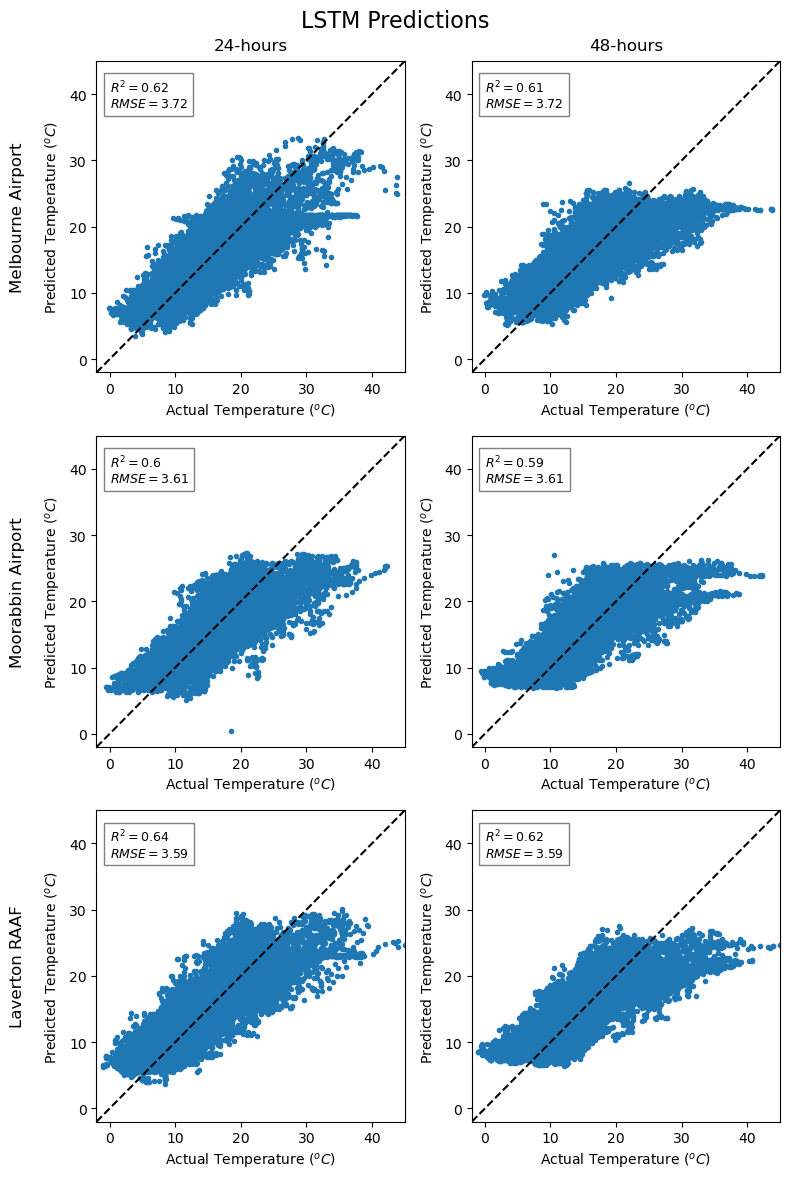

In [212]:
# Get station list
stations = list(aws_locations.keys())

fig, axes = plt.subplots(nrows=len(stations), ncols=2, figsize=(8, 12))

idx = 0

for s in range(len(stations)):
    station = stations[s]

    data_dir_24 = f"{predictions_dir}lstm_predictions_{aws_locations[station]['station_id']}_pred24.csv"
    data_dir_48 = f"{predictions_dir}lstm_predictions_{aws_locations[station]['station_id']}_pred48.csv"

    data_24 = pd.read_csv(data_dir_24)
    data_48 = pd.read_csv(data_dir_48)

    obs_24 = data_24['Measured'].to_numpy()
    preds_24 = data_24['Prediction'].to_numpy()
    obs_48 = data_48['Measured'].to_numpy()
    preds_48 = data_48['Prediction'].to_numpy()

    r2_24 = r2_score(obs_24, preds_48)
    r2_48 = r2_score(obs_48, preds_48)
    mse_24 = mean_squared_error(obs_24, preds_48, squared=False)
    mse_48 = mean_squared_error(obs_24, preds_48, squared=False)

    axes[idx, 0].scatter(obs_24, preds_24, marker='.')
    axes[idx, 0].plot([-2, 45],[-2, 45], 'k--')
    axes[idx, 0].set_xlim(-2, 45)
    axes[idx, 0].set_ylim(-2, 45)
    axes[idx,0].set_ylabel("Predicted Temperature ($^oC$)")
    axes[idx,0].set_xlabel("Actual Temperature ($^oC$)")
    eval_string = f"$ R^2={np.round(r2_24,2)}$ \n$RMSE={np.round(mse_24,2)}$"
    axes[idx, 0].text(0,38,eval_string, fontsize=9, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    axes[idx, 1].scatter(obs_48, preds_48, marker='.')
    axes[idx, 1].plot([-2, 45],[-2, 45], 'k--')
    axes[idx, 1].set_xlim(-2, 45)
    axes[idx, 1].set_ylim(-2, 45)
    axes[idx,1].set_ylabel("Predicted Temperature ($^oC$)")
    axes[idx,1].set_xlabel("Actual Temperature ($^oC$)")
    eval_string = f"$ R^2={np.round(r2_48,2)}$ \n$RMSE={np.round(mse_48,2)}$"
    axes[idx, 1].text(0,38,eval_string, fontsize=9, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    idx += 1

cols = ['24-hours', '48-hours']
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 8),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], stations):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 10, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

fig.suptitle(f"LSTM Predictions", fontsize=16)
fig.tight_layout()
fig.savefig(f'{out_dir}lstm_performance_scatter.png', dpi=500)
plt.show()

### Hexbin plot

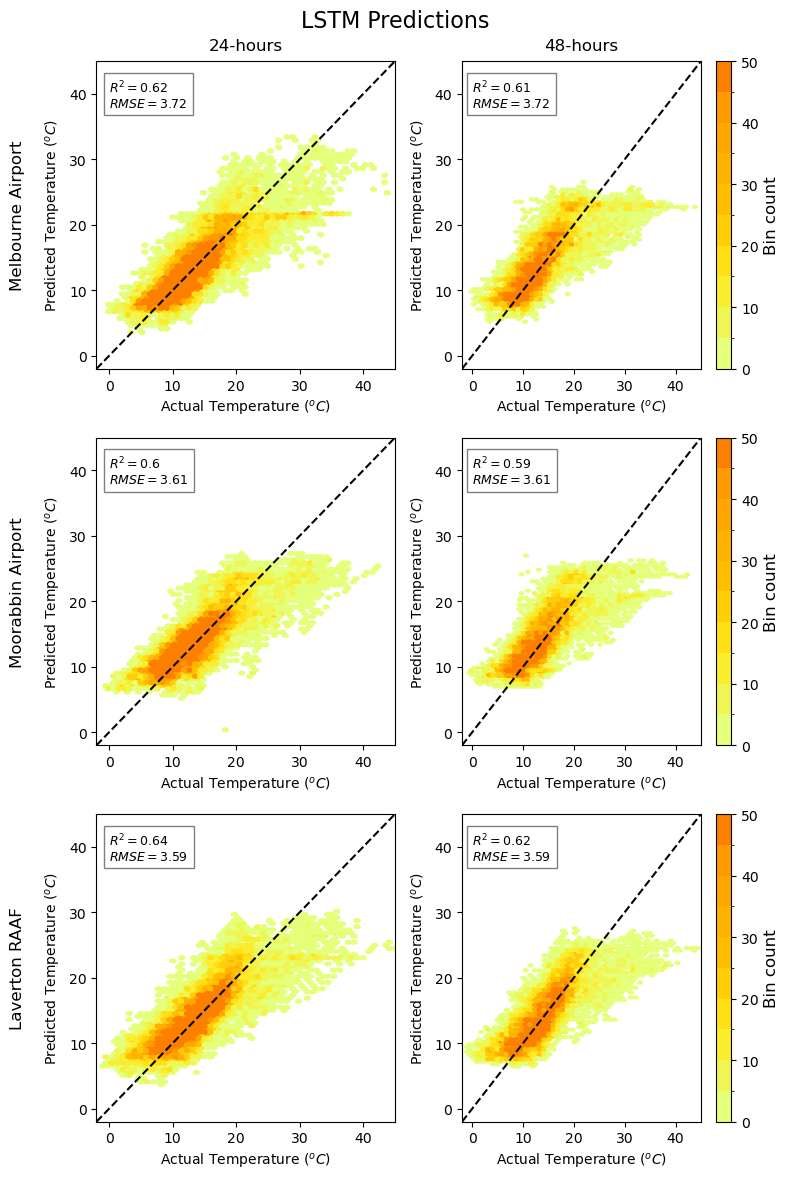

In [213]:

# Get station list
stations = list(aws_locations.keys())

fig, axes = plt.subplots(nrows=len(stations), ncols=2, figsize=(8, 12))

idx = 0

for s in range(len(stations)):
    station = stations[s]

    data_dir_24 = f"{predictions_dir}lstm_predictions_{aws_locations[station]['station_id']}_pred24.csv"
    data_dir_48 = f"{predictions_dir}lstm_predictions_{aws_locations[station]['station_id']}_pred48.csv"

    data_24 = pd.read_csv(data_dir_24)
    data_48 = pd.read_csv(data_dir_48)

    obs_24 = data_24['Measured'].to_numpy()
    preds_24 = data_24['Prediction'].to_numpy()
    obs_48 = data_48['Measured'].to_numpy()
    preds_48 = data_48['Prediction'].to_numpy()

    r2_24 = r2_score(obs_24, preds_48)
    r2_48 = r2_score(obs_48, preds_48)
    mse_24 = mean_squared_error(obs_24, preds_48, squared=False)
    mse_48 = mean_squared_error(obs_24, preds_48, squared=False)

    ## Hexbins
    bounds = np.arange(0,55,5)
    # cmap = plt.get_cmap('Wistia', 6)
    cmap = plt.get_cmap('Wistia', len(bounds))
    norm = plt_colors.BoundaryNorm(bounds, cmap.N)

    hb = axes[idx, 0].hexbin(obs_24, preds_24, gridsize=50, cmap=cmap, mincnt=1, norm=norm)
    cb = fig.colorbar(hb, ax=axes[idx,1], cmap=cmap, spacing='uniform', norm=norm)
    # cb.ax.tick_params(labelsize=12)
    cb.set_label(label='Bin count', fontsize=12)
    axes[idx, 0].plot([-2, 45],[-2, 45], 'k--')
    axes[idx, 0].set_ylabel("Predicted Temperature ($^oC$)")
    axes[idx, 0].set_xlabel("Actual Temperature ($^oC$)")
    axes[idx, 0].set_xlim(-2, 45)
    axes[idx, 0].set_ylim(-2, 45)
    eval_string = f"$R^2={np.round(r2_24,2)}$ \n$RMSE={np.round(mse_24,2)}$"
    axes[idx, 0].text(0,38,eval_string, fontsize=9, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    hb = axes[idx, 1].hexbin(obs_48, preds_48, gridsize=50, cmap=cmap, mincnt=1, norm=norm)
    # cb = fig.colorbar(hb, ax=axes[idx,1], cmap=cmap, spacing='uniform', norm=norm)
    # cb.ax.tick_params(labelsize=12)
    # cb.set_label(label='Bin count', fontsize=12)
    axes[idx, 1].plot([-2, 45],[-2, 45], 'k--')
    axes[idx, 1].set_ylabel("Predicted Temperature ($^oC$)")
    axes[idx, 1].set_xlabel("Actual Temperature ($^oC$)")
    axes[idx, 1].set_xlim(-2, 45)
    axes[idx, 1].set_ylim(-2, 45)
    eval_string = f"$R^2={np.round(r2_48,2)}$ \n$RMSE={np.round(mse_48,2)}$"
    axes[idx, 1].text(0,38,eval_string, fontsize=9, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    idx += 1

cols = ['24-hours', '48-hours']
for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 8),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], stations):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 10, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

fig.suptitle(f"LSTM Predictions", fontsize=16)
fig.tight_layout()
fig.savefig(f'{out_dir}lstm_performance_hexbin.png', dpi=500)
plt.show()